In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time as t
import multiprocessing as mp 
import concurrent.futures 
import sys
from matplotlib import pylab as pl
from MyNetworkModel_2 import Networks

In [2]:
dp = pd.read_csv("..\data\out.dolphins", delimiter='\t', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
dp = pd.DataFrame(dp)
dp = dp.drop(0, axis=0)
if dp['weight'].isnull().values.any() :
    dp['weight'] = 1

lesmis = pd.read_csv("..\data\out.moreno_lesmis_lesmis", sep = ' ', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
lesmis = pd.DataFrame(lesmis)
lesmis = lesmis.drop(0, axis=0)
if lesmis['weight'].isnull().values.any() :
    lesmis['weight'] = 1

kangaroo = pd.read_csv("..\data\out.moreno_kangaroo_kangaroo", sep = ' ', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
kangaroo = pd.DataFrame(kangaroo)
kangaroo = kangaroo.drop(0, axis=0)
if kangaroo['weight'].isnull().values.any() :
    kangaroo['weight'] = 1

football = pd.read_csv("..\data\out.dimacs10-football", delimiter='\t', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
football = pd.DataFrame(football)
football = football.drop(0, axis=0)
if football['weight'].isnull().values.any() :
    football['weight'] = 1

eurorad = pd.read_csv("..\data\out.subelj_euroroad_euroroad", sep = ' ', header = None, escapechar='%',skiprows = 1, names = ['n','nbr','weight'])
eurorad = pd.DataFrame(eurorad)
eurorad = eurorad.drop(0, axis=0)
if eurorad['weight'].isnull().values.any() :
    eurorad['weight'] = 1


In [8]:
print(f'Shape of dophin network: {dp.shape}')
print(f'Shape of lesmis network: {lesmis.shape}')
print(f'Shape of kangaroo network: {kangaroo.shape}')
print(f'Shape of football network: {football.shape}')
print(f'Shape of euroroad network: {eurorad.shape}')
# [62, 77, 115, 1174]

Shape of dophin network: (158, 3)
Shape of lesmis network: (254, 3)
Shape of kangaroo network: (91, 3)
Shape of football network: (612, 3)
Shape of euroroad network: (1417, 3)


In [3]:
dp_G = nx.Graph()
dp_G.add_weighted_edges_from(dp.values)
dp_net = Networks(dp_G)

lesmis_G = nx.Graph()
lesmis_G.add_weighted_edges_from(lesmis.values)
lesmis_net = Networks(lesmis_G)

kangaroo_G = nx.Graph()
kangaroo_G.add_weighted_edges_from(kangaroo.values)
kangaroo_net = Networks(kangaroo_G)

football_G = nx.Graph()
football_G.add_weighted_edges_from(football.values)
football_net = Networks(football_G)

start = t.perf_counter()
eurorad_G = nx.Graph()
eurorad_G.add_weighted_edges_from(eurorad.values)
eurorad_net= Networks(eurorad_G)

end = t.perf_counter()
print(f'eurorad Model Fitting time:{end-start}')

eurorad Model Fitting time:0.03239899999999807


In [10]:
[dp_net.totNodes,lesmis_net.totNodes,football_net.totNodes, eurorad_net.totNodes]

[62, 77, 115, 1174]

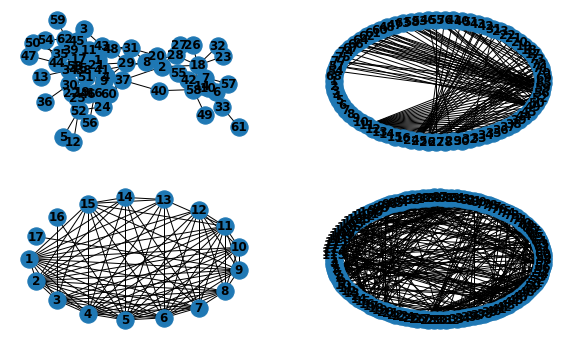

In [11]:
pl.figure(figsize=(10, 6))
plt.subplot(221)
nx.draw(dp_G, with_labels=True, font_weight='bold')
plt.subplot(222)
nx.draw_shell(lesmis_G,with_labels=True, font_weight='bold')
plt.subplot(223)
nx.draw_shell(kangaroo_G,with_labels=True, font_weight='bold')
plt.subplot(224)
nx.draw_shell(football_G,with_labels=True, font_weight='bold')

plt.savefig("../plots/networks.png")

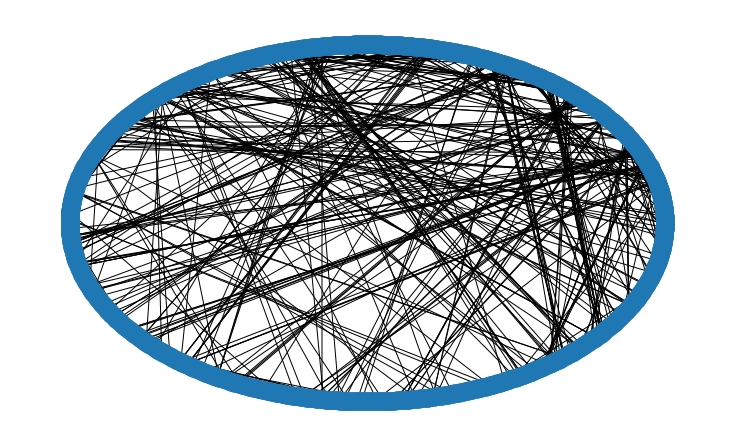

In [12]:
pl.figure(figsize=(10, 6))
nx.draw_shell(eurorad_G,with_labels=False, font_weight='bold')

In [31]:
N = 1000
ls = []
start = t.perf_counter()
dp_inits = dp_net.random_node_generator(N)
dp_sample_generated = [dp_net.MCMC_Sample_generator(Initial_state= inits, vec_func= dp_net.vec_rfc_dd) for inits in dp_inits]
end = t.perf_counter()
ls.append((end-start)/N)


11th Session Start....
Session end...0.0342955000000984
12th Session Start....
Session end...0.04069310000022597
13th Session Start....
Session end...0.03211689999989176
14th Session Start....
Session end...0.021644999999807624
15th Session Start....
Session end...0.01488759999983813
16th Session Start....
Session end...0.04424520000020493
17th Session Start....
Session end...0.019737999999961175
18th Session Start....
Session end...0.009196999999858235
19th Session Start....
Session end...0.019029100000352628
20th Session Start....
Session end...0.02895300000000134
21th Session Start....
Session end...0.010768300000108866
22th Session Start....
Session end...0.03174760000001697
23th Session Start....
Session end...0.013031799999680516
24th Session Start....
Session end...0.022089499999765394
25th Session Start....
Session end...0.03409610000016983
26th Session Start....
Session end...0.04698000000007596
27th Session Start....
Session end...0.031365199999981996
28th Session Start....
S

In [15]:
football_inits = football_net.random_node_generator(N)
ft_sample_generated = [football_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= football_net.vec_rfc) for state in football_inits]


1th Session Start....
Session end...0.09745970000039961
2th Session Start....
Session end...0.08488689999830967
3th Session Start....
Session end...0.06988799999999173
4th Session Start....
Session end...0.1647858999986056
5th Session Start....
Session end...0.09500590000061493
6th Session Start....
Session end...0.059644099999786704
7th Session Start....
Session end...0.08585239999956684
8th Session Start....
Session end...0.046878600000127335
9th Session Start....
Session end...0.07313620000059018
10th Session Start....
Session end...0.11485420000099111
11th Session Start....
Session end...0.0678263000008883
12th Session Start....
Session end...0.06976170000052662
13th Session Start....
Session end...0.13876589999927091
14th Session Start....
Session end...0.11204469999938738
15th Session Start....
Session end...0.22861699999884877
16th Session Start....
Session end...0.18826679999983753
17th Session Start....
Session end...0.13367189999917173
18th Session Start....
Session end...0.2

In [27]:
N = 1000
ls = []
start = t.perf_counter()
dp_inits = dp_net.random_node_generator(N)
dp_sample_generated = [dp_net.MCMC_Sample_generator(Initial_state= inits, vec_func= dp_net.vec_rfc) for inits in dp_inits]
end = t.perf_counter()
ls.append((end-start)/N)

start = t.perf_counter()
lesmis_inits = lesmis_net.random_node_generator(N)
lesmist_sample_generated = [lesmis_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= lesmis_net.vec_rfc) for state in lesmis_inits]
end = t.perf_counter()
ls.append((end-start)/N)


start = t.perf_counter()
kangaroo_inits = kangaroo_net.random_node_generator(N)
kangaroo_sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_rfc) for state in kangaroo_inits]
end = t.perf_counter()
ls.append((end-start)/N)


start = t.perf_counter()
football_inits = football_net.random_node_generator(N)
ft_sample_generated = [football_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= football_net.vec_rfc) for state in football_inits]
end = t.perf_counter()
ls.append((end-start)/N)



start = t.perf_counter()
er_inits = eurorad_net.random_node_generator(N)
er_sample = [eurorad_net.MCMC_Sample_generator(inits, proportion = 0.8, vec_func=eurorad_net.vec_rfc) for inits in er_inits]
end = t.perf_counter()
ls.append((end-start)/N)


N = 1000
ls2 = []
start = t.perf_counter()
dp_inits = dp_net.random_node_generator(N)
dp_sample_generated = [dp_net.MCMC_Sample_generator(Initial_state= inits, vec_func= dp_net.vec_uniform) for inits in dp_inits]
end = t.perf_counter()
ls2.append((end-start)/N)

start = t.perf_counter()
lesmis_inits = lesmis_net.random_node_generator(N)
lesmist_sample_generated = [lesmis_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= lesmis_net.vec_uniform) for state in lesmis_inits]
end = t.perf_counter()
ls2.append((end-start)/N)


start = t.perf_counter()
kangaroo_inits = kangaroo_net.random_node_generator(N)
kangaroo_sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_uniform) for state in kangaroo_inits]
end = t.perf_counter()
ls2.append((end-start)/N)


start = t.perf_counter()
football_inits = football_net.random_node_generator(N)
ft_sample_generated = [football_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= football_net.vec_uniform) for state in football_inits]
end = t.perf_counter()
ls2.append((end-start)/N)



start = t.perf_counter()
er_inits = eurorad_net.random_node_generator(N)
er_sample = [eurorad_net.MCMC_Sample_generator(inits, proportion = 0.8, vec_func=eurorad_net.vec_uniform) for inits in er_inits]
end = t.perf_counter()
ls2.append((end-start)/N)

4051th Session Start....
Session end...0.03784810000024663
4052th Session Start....
Session end...0.01681209999969724
4053th Session Start....
Session end...0.01653439999972761
4054th Session Start....
Session end...0.021935499999926833
4055th Session Start....
Session end...0.022932400000172493
4056th Session Start....
Session end...0.02902559999984078
4057th Session Start....
Session end...0.00970580000011978
4058th Session Start....
Session end...0.027302099999815255
4059th Session Start....
Session end...0.012650699999994686
4060th Session Start....
Session end...0.017862400000012713
4061th Session Start....
Session end...0.014772399999856134
4062th Session Start....
Session end...0.018776599999910104
4063th Session Start....
Session end...0.018970600000102422
4064th Session Start....
Session end...0.011965700000018842
4065th Session Start....
Session end...0.016395500000271568
4066th Session Start....
Session end...0.01762300000018513
4067th Session Start....
Session end...0.00863

KeyboardInterrupt: 

In [24]:
print(ls,'\n',ls2)
#ls rfc, ls2 uniform

[0.012016857500000014, 0.05348173969999993, 0.019717516799999883, 0.10173082009999984, 0.11715342029999966] 
 [0.0027326817000002846, 0.005936332700000093, 0.0013552026000002116, 0.009636579200000142, 0.09420133600000008]


In [19]:
N = 10
ls2 = []
start = t.perf_counter()
dp_inits = dp_net.random_node_generator(N)
dp_sample_generated = [dp_net.MCMC_Sample_generator(Initial_state= inits, vec_func= dp_net.vec_uniform) for inits in dp_inits]
end = t.perf_counter()
ls2.append((end-start)/N)

start = t.perf_counter()
lesmis_inits = lesmis_net.random_node_generator(N)
lesmist_sample_generated = [lesmis_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= lesmis_net.vec_uniform) for state in lesmis_inits]
end = t.perf_counter()
ls2.append((end-start)/N)


start = t.perf_counter()
kangaroo_inits = kangaroo_net.random_node_generator(N)
kangaroo_sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_uniform) for state in kangaroo_inits]
end = t.perf_counter()
ls2.append((end-start)/N)


start = t.perf_counter()
football_inits = football_net.random_node_generator(N)
ft_sample_generated = [football_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= football_net.vec_uniform) for state in football_inits]
end = t.perf_counter()
ls2.append((end-start)/N)



start = t.perf_counter()
er_inits = eurorad_net.random_node_generator(N)
er_sample = [eurorad_net.MCMC_Sample_generator(inits, proportion = 0.8, vec_func=eurorad_net.vec_uniform) for inits in er_inits]
end = t.perf_counter()
ls2.append((end-start)/N)

1001th Session Start....
Session end...0.006260400001337985
1002th Session Start....
Session end...0.002113200000167126
1003th Session Start....
Session end...0.002246500000183005
1004th Session Start....
Session end...0.0017184999996970873
1005th Session Start....
Session end...0.0015582999985781498
1006th Session Start....
Session end...0.0019599000006564893
1007th Session Start....
Session end...0.001781200000550598
1008th Session Start....
Session end...0.0016480999984196387
1009th Session Start....
Session end...0.003013900000951253
1010th Session Start....
Session end...0.0022829999979876447
1th Session Start....
Session end...0.004027999999379972
2th Session Start....
Session end...0.005169199997908436
3th Session Start....
Session end...0.004104100000404287
4th Session Start....
Session end...0.003977700001996709
5th Session Start....
Session end...0.004429700002219761
6th Session Start....
Session end...0.009079899999051122
7th Session Start....
Session end...0.007277699998667

In [26]:
N = 10
dp_inits = dp_net.random_node_generator(N)
if __name__ == "__main__":
    print('Session start')
    start = t.perf_counter()
#Assuming you want to use 3 processors
    num_processors = N
    #Create a pool of processors
    p=mp.Pool(processes = num_processors)
    #get them to work in parallel
    output = p.map(dp_net.MCMC_Sample_generator,dp_inits)
    print(output)

    end = t.perf_counter()
    #6.2 s, 0.62s avg
    


Session start
[[2, 8, 10, 14, 15, 16, 17, 18, 19, 20, 25, 28, 34, 35, 38, 39, 41, 46, 51, 52, 55], [33, 2, 6, 7, 8, 10, 42, 14, 18, 29, 55, 57, 58, 61, 31], [32, 33, 2, 6, 7, 8, 10, 14, 18, 61, 55, 57, 58, 27, 28, 29, 31], [1, 34, 2, 37, 5, 38, 39, 46, 15, 16, 17, 51, 52, 19, 24, 25, 56, 29], [9, 12, 15, 17, 19, 21, 22, 24, 30, 35, 37, 38, 39, 45, 46, 52, 54, 60, 62], [4, 8, 14, 15, 17, 18, 23, 24, 25, 32, 33, 37, 41, 42, 46, 51, 52, 53, 55, 58, 60], [6, 7, 14, 15, 17, 18, 22, 24, 30, 34, 37, 38, 39, 40, 45, 46, 52, 53, 57, 58, 59, 60], [1, 3, 5, 9, 11, 12, 15, 16, 17, 21, 22, 34, 38, 41, 45, 46, 51, 52, 56], [1, 2, 58, 37, 6, 41, 14, 16, 18, 19, 21, 23, 25, 26, 27, 28, 30, 57], [4, 10, 13, 14, 15, 16, 17, 18, 19, 21, 22, 33, 34, 37, 39, 40, 41, 42, 53, 58, 60]]


In [28]:
print(dp_net.Sample_Index,football_net.Sample_Index,eurorad_net.Sample_Index)

4222 2002 2002


In [32]:
dp_bs_sample = dp_net.Best_sampler(samples = dp_net.Sample_list,vec_fun=dp_net.vec_rfc_dd)
dp_bs_sample_subgraph = dp_net.sub_graph(dp_bs_sample)
print(dp_net.betweenness_dif_percent(dp_bs_sample_subgraph), dp_net.closeness_dif_percent(dp_bs_sample_subgraph))
#0.6

# N=1000, 8.758574852317539 19.123619370796582 0.6s
# N=100, 10.46507540951161 20.08752699773044
# N = 10, 34.92299112634706 7.148426543518668 0.2s

10.46507540951161 20.08752699773044


In [22]:
dp_net.Sample_Index

4050

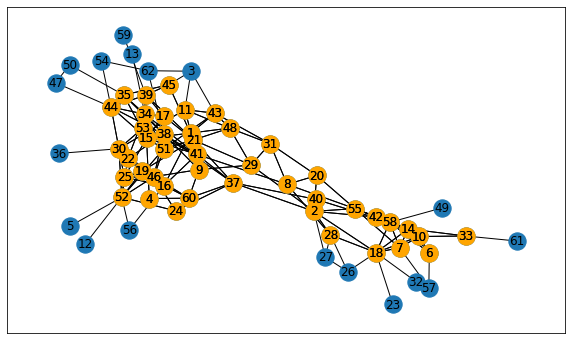

In [26]:
pos = nx.spring_layout(dp_net.G)
pl.figure(figsize=(10, 6))
nx.draw_networkx(dp_net.G,pos=pos)
subgraph = dp_net.sub_graph(dp_bs_sample)
nx.draw_networkx(subgraph,pos=pos,node_color = 'orange')
plt.savefig("../plots/dp_bs_rfc_dd.png")


In [14]:
dp_bs_sample = dp_net.Best_sampler(samples = dp_net.Sample_list,vec_fun=dp_net.vec_rfc)
dp_bs_sample_subgraph = dp_net.sub_graph(dp_bs_sample)
print(dp_net.betweenness_dif_percent(dp_bs_sample_subgraph), dp_net.closeness_dif_percent(dp_bs_sample_subgraph))
#0.3s

5.1962660182402605 16.43767655936153


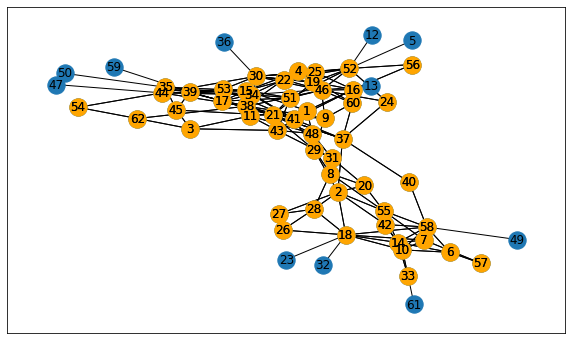

In [33]:
pos = nx.spring_layout(dp_net.G)
pl.figure(figsize=(10, 6))
nx.draw_networkx(dp_net.G,pos=pos)
subgraph = dp_net.sub_graph(dp_bs_sample)
nx.draw_networkx(subgraph,pos=pos,node_color = 'orange')


In [17]:
# N = 1000
ft_bs_sample = football_net.Best_sampler(samples = football_net.Sample_list,vec_fun=football_net.vec_rfc)
ft_bs_sample_subgraph = football_net.sub_graph(ft_bs_sample)
print(football_net.betweenness_dif_percent(ft_bs_sample_subgraph), football_net.closeness_dif_percent(ft_bs_sample_subgraph))
#0.8s

5.05261090610095 0.2261474113587523


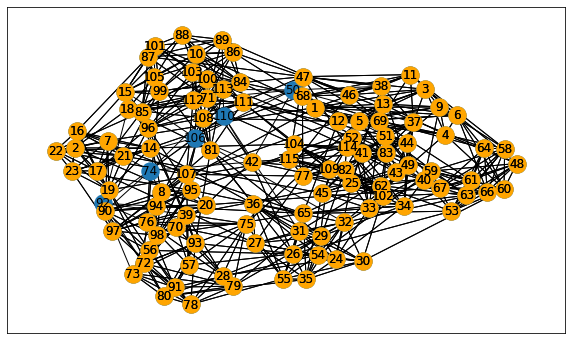

In [18]:
pos = nx.spring_layout(football_net.G)
pl.figure(figsize=(10, 6))
nx.draw_networkx(football_net.G,pos=pos)
subgraph = football_net.sub_graph(ft_bs_sample)
nx.draw_networkx(subgraph,pos=pos,node_color = 'orange')
plt.savefig("../plots/ft_bs.png")

In [43]:
er_bs_sample =eurorad_net.Best_sampler(samples =eurorad_net.Sample_list,vec_fun=eurorad_net.vec_rfc)
er_bs_sample_subgraph =eurorad_net.sub_graph(er_bs_sample)
print(eurorad_net.betweenness_dif_percent(er_bs_sample_subgraph),eurorad_net.closeness_dif_percent(er_bs_sample_subgraph))
#time taken 1m6.4s

5.021002011248692 3.278405621141999


In [44]:
pos = nx.spring_layout(eurorad_net.G)
pl.figure(figsize=(10, 6))
nx.draw_networkx(eurorad_net.G,pos=pos)
subgraph = eurorad_net.sub_graph(er_bs_sample)
nx.draw_networkx(subgraph,pos=pos,node_color = 'orange')

ModuleNotFoundError: No module named 'scipy'

In [45]:
lesmis_sample =lesmis_net.Best_sampler(samples =lesmis_net.Sample_list,vec_fun=lesmis_net.vec_rfc)
lesmis_sample_subgraph =lesmis_net.sub_graph(lesmis_sample)
print(lesmis_net.betweenness_dif_percent(lesmis_sample_subgraph),lesmis_net.closeness_dif_percent(lesmis_sample_subgraph))

4.444755045028135 12.049370308983155


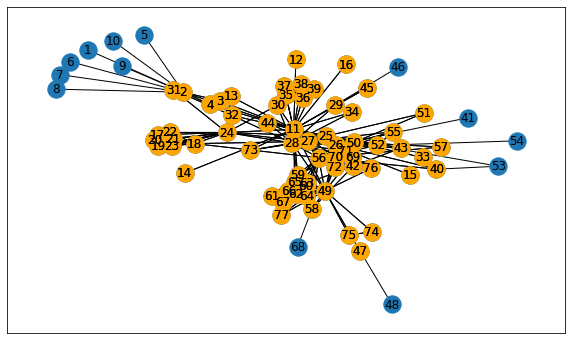

In [48]:
pos = nx.spring_layout(lesmis_net.G)
pl.figure(figsize=(10, 6))
nx.draw_networkx(lesmis_net.G,pos=pos)
subgraph = lesmis_net.sub_graph(lesmis_sample)
nx.draw_networkx(subgraph,pos=pos,node_color = 'orange')
# plt.savefig("../plots/lesmis_bs_sample.png")

In [14]:
# convergence
sample_num = [1,5,10,100,200,300,1000]
avg_bias_dif = []
avg_cls_dif = []
avg_bias_dif_rfc_dd = []
avg_cls_dif_rfc_dd = []
for N in sample_num:
    bias_dif = []
    cls_dif = []
    initials = kangaroo_net.random_node_generator(N)
    sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_rfc_dd) for state in initials]
    for sample in sample_generated:
        subgraph = kangaroo_net.sub_graph(sample)
        bias_dif.append(kangaroo_net.betweenness_criteria(subgraph))
        cls_dif.append(kangaroo_net.closeness_criteria(subgraph))
    avg_bias_dif_rfc_dd.append(sum(bias_dif)/len(bias_dif))
    avg_cls_dif_rfc_dd.append(sum(cls_dif)/len(cls_dif))

    # sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_rfc_dd) for state in initials]
    # sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_uniform) for state in initials]




4452th Session Start....
Session end...0.028478499999891937
4453th Session Start....
Session end...0.02954160000012962
4454th Session Start....
Session end...0.020273599999882208
4455th Session Start....
Session end...0.01793339999994714
4456th Session Start....
Session end...0.027766899999960515
4457th Session Start....
Session end...0.030730700000049183
4458th Session Start....
Session end...0.028846800000110306
4459th Session Start....
Session end...0.01373280000007071
4460th Session Start....
Session end...0.02409750000015265
4461th Session Start....
Session end...0.03130719999990106
4462th Session Start....
Session end...0.024222699999882025
4463th Session Start....
Session end...0.027950800000098752
4464th Session Start....
Session end...0.032345099999929516
4465th Session Start....
Session end...0.03485999999998057
4466th Session Start....
Session end...0.019655099999908998
4467th Session Start....
Session end...0.03279900000006819
4468th Session Start....
Session end...0.031619

In [25]:
sample_num = [1,5,10,100,200,300,1000]
avg_bias_dif_rfc = []
avg_cls_dif_rfc = []
for N in sample_num:
    bias_dif = []
    cls_dif = []
    initials = kangaroo_net.random_node_generator(N)
    sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_rfc) for state in initials]
    for sample in sample_generated:
        subgraph = kangaroo_net.sub_graph(sample)
        bias_dif.append(kangaroo_net.betweenness_criteria(subgraph))
        cls_dif.append(kangaroo_net.closeness_criteria(subgraph))
    avg_bias_dif_rfc.append(sum(bias_dif)/len(bias_dif))
    avg_cls_dif_rfc.append(sum(cls_dif)/len(cls_dif))

9833th Session Start....
Session end...0.020060499999999593
9834th Session Start....
Session end...0.03198179999981221
9835th Session Start....
Session end...0.033861500000057276
9836th Session Start....
Session end...0.02752809999992678
9837th Session Start....
Session end...0.022880299999997078
9838th Session Start....
Session end...0.025396599999567115
9839th Session Start....
Session end...0.028980399999909423
9840th Session Start....
Session end...0.02745939999977054
9841th Session Start....
Session end...0.011665099999845552
9842th Session Start....
Session end...0.025423900000077992
9843th Session Start....
Session end...0.017937300000085088
9844th Session Start....
Session end...0.01414710000017294
9845th Session Start....
Session end...0.015599299999848881
9846th Session Start....
Session end...0.01463530000000901
9847th Session Start....
Session end...0.01825879999978497
9848th Session Start....
Session end...0.02309110000032888
9849th Session Start....
Session end...0.018610

13449th Session Start....
Session end...0.017989099999795144
13450th Session Start....
Session end...0.029949499999929685
13451th Session Start....
Session end...0.03359160000036354
13452th Session Start....
Session end...0.04540419999966616
13453th Session Start....
Session end...0.01997250000022177
13454th Session Start....
Session end...0.016651399999773275
13455th Session Start....
Session end...0.017984900000101334
13456th Session Start....
Session end...0.017588500000329077
13457th Session Start....
Session end...0.018546799999967334
13458th Session Start....
Session end...0.021605999999792402
[[8, 13], [10, 1], [14, 13], [3, 5], [6, 5], [13, 6], [3, 5], [14, 4], [15], [11]]


In [39]:
avg_bias_dif_rfc
subgraph = kangaroo_net.sub_graph(sample_generated[2] )
bias_dif.append(kangaroo_net.betweenness_criteria(subgraph))
print(a, sample_generated[2],subgraph)
kangaroo_net.betweenness_criteria(subgraph)

None [10, 1] Graph with 2 nodes and 1 edges


0.004186851211072663

In [15]:
avg_bias_dif_rfc = avg_bias_dif
avg_cls_dif_rfc = avg_cls_dif

In [21]:
sample_num = [1,5,10,100,200,300,1000]
# avg_bias_dif = []
# avg_cls_dif = []
avg_bias_dif_uniform = []
avg_cls_dif_rfc_uniform = []
for N in sample_num:
    bias_dif = []
    cls_dif = []
    initials = kangaroo_net.random_node_generator(N)
    sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_uniform) for state in initials]
    for sample in sample_generated:
        subgraph = kangaroo_net.sub_graph(sample)
        bias_dif.append(kangaroo_net.betweenness_criteria(subgraph))
        cls_dif.append(kangaroo_net.closeness_criteria(subgraph))
    avg_bias_dif_uniform.append(sum(bias_dif)/len(bias_dif))
    avg_cls_dif_rfc_uniform.append(sum(cls_dif)/len(cls_dif))

    # sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_rfc_dd) for state in initials]
    # sample_generated = [kangaroo_net.MCMC_Sample_generator(Initial_state=state, proportion=0.8, vec_func= kangaroo_net.vec_uniform) for state in initials]




7684th Session Start....
Session end...0.0012195999997857143
7685th Session Start....
Session end...0.00829780000003666
7686th Session Start....
Session end...0.0009905000001708686
7687th Session Start....
Session end...0.0009380000001328881
7688th Session Start....
Session end...0.0014622999997300212
7689th Session Start....
Session end...0.0007519999999203719
7690th Session Start....
Session end...0.002945199999885517
7691th Session Start....
Session end...0.0014702000003126159
7692th Session Start....
Session end...0.0012212999999974272
7693th Session Start....
Session end...0.0007733999996162311
7694th Session Start....
Session end...0.0007445999999617925
7695th Session Start....
Session end...0.000763200000164943
7696th Session Start....
Session end...0.0008628999999018561
7697th Session Start....
Session end...0.0007463000001735054
7698th Session Start....
Session end...0.0006939999998394342
7699th Session Start....
Session end...0.000724399999853631
7700th Session Start....
Sess

In [22]:
avg_bias_dif_uniform 

[0.004186851211072663,
 0.004186851211072663,
 0.004186851211072664,
 0.004186851211072654,
 0.004186851211072653,
 0.004186851211072675,
 0.0041868512110726395]

Text(0, 0.5, 'Average MSE')

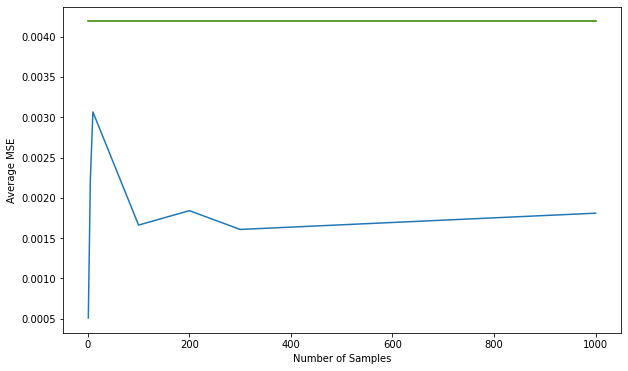

In [20]:
pl.figure(figsize=(10, 6))

plt.plot(sample_num, avg_bias_dif_rfc)
plt.plot(sample_num, avg_bias_dif_rfc_dd)
plt.plot(sample_num, avg_bias_dif_uniform)
# plt.plot(sample_num,avg_cls_dif)
plt.xlabel('Number of Samples')
plt.ylabel('Average MSE')